In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import chirp, find_peaks, peak_widths
import matplotlib.pyplot as plt
from plots import wavelength_to_rgb
import matplotlib
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
def FWHM(X,Y):
    m = max(Y) / 2
    d = Y - m
    indexes = np.where(d > 0)[0]
    return abs(X[indexes[-1]] - X[indexes[0]])

def FWHM_hlines(X,Y):
    y = max(Y) / 2
    d = Y - y
    indexes = np.where(d > 0)[0]
    return y, X[indexes[0]], X[indexes[-1]]

def CWLs(X,Y):
    y = max(Y) / 2
    d = Y - y
    indexes = np.where(d > 0)[0]
    return np.mean(X[indexes])

In [3]:
wavel_df = pd.read_pickle('wavel_df.pkl')
inten_df = pd.read_pickle('inten_fin.pkl')

In [4]:
wavel_array = wavel_df.iloc[:, 0].values

In [5]:
banda_cyan_df = inten_df.iloc[104544:127920,:]
banda_lgreen_df = inten_df.iloc[78967:104544,:]
banda_orange_df = inten_df.iloc[52866:78967,:]
banda_red_df = inten_df.iloc[19459:52866,:]
banda_NIR_df = inten_df.iloc[0:19459,:]
bandas = [banda_NIR_df, banda_red_df, banda_orange_df,banda_lgreen_df,banda_cyan_df]

In [6]:
means = [banda.mean(axis=0) for banda in bandas]

In [7]:
CWLs = [CWLs(wavel_array,mean) for mean in means]
CWLs

[805.321343538418,
 637.8748886441881,
 632.5176229595554,
 547.4565795671202,
 490.324168570146]

In [8]:
FWHMs = [FWHM(wavel_array,mean) for mean in means]

In [9]:
data_hlines = [FWHM_hlines(wavel_array,mean) for mean in means]

ys = []
inits = []
ends = []

for i in range(len(data_hlines)):
    ys.append(data_hlines[i][0])
    inits.append(data_hlines[i][1])
    ends.append(data_hlines[i][2])

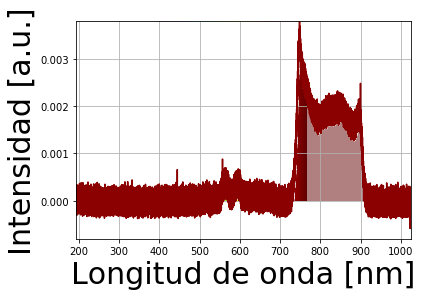

In [10]:
plt.grid()
clim = (350, 780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0], clim[1] + 1, 2)
colorlist = list(zip(norm(wl), [wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)
wavelengths = wavel_array
spectrum = np.transpose(means[0])
plt.plot(wavel_array, spectrum, color='darkred')
y = np.linspace(0, np.max(spectrum), 100)
X, Y = np.meshgrid(wavelengths, y)

extent = (np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))

plt.imshow(X, clim=clim, extent=extent, cmap=spectralmap, aspect='auto')
plt.xlabel('Longitud de onda [nm]',fontsize=30)
plt.ylabel('Intensidad [a.u.]',fontsize=30)

plt.fill_between(wavelengths, spectrum ,np.max(spectrum), color='w')
plt.show()

In [22]:
plt.grid()
plt.plot(wavel_array, means[4])
plt.xlabel('Longitud de onda [nm]',fontsize=30)
plt.ylabel('Intensidad [u.a.]',fontsize=30)
plt.show()

In [13]:
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig.suptitle('Bands Mean Spectrum: I[u.a.] vs Wavelength[nm]')
ax1.plot(wavel_array, means[4])
ax2.plot(wavel_array, means[3])
ax3.plot(wavel_array, means[2])
ax4.plot(wavel_array, means[1])
ax5.plot(wavel_array, means[0])

#ax1.grid()
ax1.get_yaxis().set_visible(False)
#ax2.grid()
ax2.get_yaxis().set_visible(False)
#ax3.grid()
ax3.get_yaxis().set_visible(False)
#ax4.grid()
ax4.get_yaxis().set_visible(False)
#ax5.grid()
ax5.get_yaxis().set_visible(False)

ax1.hlines(ys[4],inits[4],ends[4],color="C2",lw=2,linestyle='dashed')
#ax1.vlines(CWLs[4],0,ys[4]*2,color="C4",lw=2,linestyle='dashed')
textstr = '\n'.join((
    r'Cyan band',
    r'$CWL = %.0f$nm' % (CWLs[4], ),
    r'$FWHM = %.0f$nm' % (FWHMs[4], )))
    
ax1.set_xlim([400,1000])
ax1.text(0.05, 0.8, textstr, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)


ax2.hlines(ys[3],inits[3],ends[3],color="C2",lw=2,linestyle='dashed')
textstr = '\n'.join((
    r'Green band',
    r'$CWL = %.0f$nm' % (CWLs[3], ),
    r'$FWHM = %.0f$nm' % (FWHMs[3], )))
ax2.text(0.05, 0.8, textstr, transform=ax2.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
ax2.set_xlim([400, 800])


ax3.hlines(ys[2],inits[2],ends[2],color="C2",lw=2,linestyle='dashed')
ax3.set_xlim([400, 800])
textstr = '\n'.join((
    r'Panchromatic band',
    r'$CWL = %.0f$nm' % (CWLs[2], ),
    r'$FWHM = %.0f$nm' % (FWHMs[2], )))
ax3.text(0.05, 0.8, textstr, transform=ax3.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

ax4.hlines(ys[1],inits[1],ends[1],color="C2",lw=2,linestyle='dashed')
ax4.set_xlim([400, 800]) 
textstr = '\n'.join((
    r'Red band',
    r'$CWL = %.0f$nm' % (CWLs[1], ),
    r'$FWHM = %.0f$nm' % (FWHMs[1], )))
ax4.text(0.05, 0.8, textstr, transform=ax4.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)


ax5.hlines(ys[0],inits[0],ends[0],color="C2",lw=2,linestyle='dashed')
ax5.set_xlim([400, 1000]) 
textstr = '\n'.join((
    r'IR band',
    r'$CWL = %.0f$nm' % (CWLs[0], ),
    r'$FWHM = %.0f$nm' % (FWHMs[0], )))
ax5.text(0.05, 0.8, textstr, transform=ax5.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)



plt.show()

In [ ]:

plt.plot(wavel_array,cyan_array,'*')
plt.hlines(m,init,end,color="C2",lw=4)
label="FWHM: {:.0f}nm".format(end-init)
plt.text(end/2, m, label, ha='left', va='center')
plt.show()

In [ ]:
d = cyan_array - (max(cyan_array) / 2)

In [ ]:
indexes = np.where(d > 0)[0]
indexes